In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import datetime as dt
import torch as torch
import matplotlib.pyplot as plt

import torch.nn as nn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

from scipy.special import softmax

In [15]:
df = pd.read_csv('clean_data.csv')

In [16]:
df.head()

,Unnamed: 0,Brazil Open,Brazil High,Brazil Low,Brazil Close,Brazil Adj Close,Brazil Volume,Brazil Returns,Russia Open,Russia High,...,Date,year,sin_day,cos_day,sin_day_of_week,cos_day_of_week,sin_month,cos_month,sin_week_of_year,cos_week_of_year
0,0,78.500000,79.370003,78.070000,79.220001,53.268791,16069100.0,0.022062,149.070007,150.550003,...,1301616000,2011,0.258819,0.965926,-0.433884,-0.900969,1.0,6.123234e-17,1.000000,-1.608123e-16
1,1,78.500000,79.370003,78.070000,79.220001,53.268791,16069100.0,0.000000,149.070007,150.550003,...,1301702400,2011,0.500000,0.866025,-0.974928,-0.222521,1.0,6.123234e-17,1.000000,-1.608123e-16
2,2,78.500000,79.370003,78.070000,79.220001,53.268791,16069100.0,0.000000,149.070007,150.550003,...,1301788800,2011,0.707107,0.707107,-0.781831,0.623490,1.0,6.123234e-17,1.000000,-1.608123e-16
3,3,79.540001,79.820000,79.029999,79.779999,53.645351,11201500.0,0.007069,151.899994,152.990005,...,1301875200,2011,0.866025,0.500000,0.000000,1.000000,1.0,6.123234e-17,0.992709,-1.205367e-01
4,4,79.449997,80.080002,79.230003,79.510002,53.463795,11899700.0,-0.003384,151.160004,152.160004,...,1301961600,2011,0.965926,0.258819,0.781831,0.623490,1.0,6.123234e-17,0.992709,-1.205367e-01


In [17]:
df.drop(columns={'Unnamed: 0"}, inplace=True)

In [18]:
df.head()

,Brazil Open,Brazil High,Brazil Low,Brazil Close,Brazil Adj Close,Brazil Volume,Brazil Returns,Russia Open,Russia High,Russia Low,...,Date,year,sin_day,cos_day,sin_day_of_week,cos_day_of_week,sin_month,cos_month,sin_week_of_year,cos_week_of_year
0,78.500000,79.370003,78.070000,79.220001,53.268791,16069100.0,0.022062,149.070007,150.550003,149.070007,...,1301616000,2011,0.258819,0.965926,-0.433884,-0.900969,1.0,6.123234e-17,1.000000,-1.608123e-16
1,78.500000,79.370003,78.070000,79.220001,53.268791,16069100.0,0.000000,149.070007,150.550003,149.070007,...,1301702400,2011,0.500000,0.866025,-0.974928,-0.222521,1.0,6.123234e-17,1.000000,-1.608123e-16
2,78.500000,79.370003,78.070000,79.220001,53.268791,16069100.0,0.000000,149.070007,150.550003,149.070007,...,1301788800,2011,0.707107,0.707107,-0.781831,0.623490,1.0,6.123234e-17,1.000000,-1.608123e-16
3,79.540001,79.820000,79.029999,79.779999,53.645351,11201500.0,0.007069,151.899994,152.990005,151.899994,...,1301875200,2011,0.866025,0.500000,0.000000,1.000000,1.0,6.123234e-17,0.992709,-1.205367e-01
4,79.449997,80.080002,79.230003,79.510002,53.463795,11899700.0,-0.003384,151.160004,152.160004,151.160004,...,1301961600,2011,0.965926,0.258819,0.781831,0.623490,1.0,6.123234e-17,0.992709,-1.205367e-01


In [19]:
def feature_label_split(df, target_cols):
    targets = [target for target in target_cols]
    y = df[targets]
    X = df.drop(columns=targets)
    return X, y

def train_val_test_split(df, target_cols, test_ratio):
    val_ratio = test_ratio / (1 - test_ratio)
    X, y = feature_label_split(df, target_cols)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio, shuffle=False)
    return X_train, X_val, X_test, y_train, y_val, y_test

returns = [returns for returns in df.columns if "Returns" in returns] # unreal stuff, don"t ask me how 
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(df, returns, 0.2)

In [20]:
y_train

,Brazil Returns,Russia Returns,India Returns,China Returns,South Africa Returns
0,0.022062,0.018675,0.000995,0.013873,0.028368
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.007069,0.013085,0.001597,0.021285,0.004974
4,-0.003384,-0.002360,-0.003597,-0.005955,0.000786
...,...,...,...,...,...
2404,-0.033454,0.012383,0.014967,-0.007672,0.006487
2405,0.000249,-0.012957,-0.003214,0.009742,0.004382
2406,-0.006721,0.012812,-0.020878,0.006891,0.003056
2407,0.000000,-0.006118,-0.009533,0.001521,0.006476


In [21]:
scaler = MinMaxScaler()

X_train_arr = scaler.fit_transform(X_train)
X_val_arr = scaler.transform(X_val)
X_test_arr = scaler.transform(X_test)

y_train_arr = scaler.fit_transform(y_train)
y_val_arr = scaler.transform(y_val)
y_test_arr = scaler.transform(y_test)

In [22]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 64

train_features = torch.Tensor(X_train_arr)
train_targets = torch.Tensor(y_train_arr)
val_features = torch.Tensor(X_val_arr)
val_targets = torch.Tensor(y_val_arr)
test_features = torch.Tensor(X_test_arr)
test_targets = torch.Tensor(y_test_arr)

train = TensorDataset(train_features, train_targets)
val = TensorDataset(val_features, val_targets)
test = TensorDataset(test_features, test_targets)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader_one = DataLoader(test, batch_size=1, shuffle=False, drop_last=True)

In [23]:
train_targets

tensor([[0.7362, 0.5139, 0.4455, 0.5457, 0.6899],
        [0.6485, 0.4469, 0.4403, 0.4668, 0.5078],
        [0.6485, 0.4469, 0.4403, 0.4668, 0.5078],
        ...,
        [0.6218, 0.4928, 0.3323, 0.5060, 0.5275],
        [0.6485, 0.4249, 0.3910, 0.4755, 0.5494],
        [0.5898, 0.4469, 0.5244, 0.4651, 0.4539]])

## LSTM

In [24]:
device = torch.device("cpu", 1)

In [25]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(LSTMModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don"t, we'll backprop all the way to the start even after going through another batch
        # Forward propagation by passing in the input, hidden state, and cell state into the model
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out

In [26]:
def get_model(model, model_params):
    models = {
        "lstm": LSTMModel,
    }
    return models.get(model.lower())(**model_params)

In [27]:
class Optimization:
    def __init__(self, model, loss_fn, optimizer):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []
    
    def train_step(self, x, y):
        # Sets model to train mode
        self.model.train()

        # Makes predictions
        yhat = self.model(x)

        # Computes loss
        loss = self.loss_fn(y, yhat)

        # Computes gradients
        loss.backward()

        # Updates parameters and zeroes gradients
        self.optimizer.step()
        self.optimizer.zero_grad()

        # Returns the loss
        return loss.item()

    def train(self, train_loader, val_loader, batch_size=64, n_epochs=50, n_features=1):
        # model_path = f'models/{self.model}_{dt.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}.pt'
        model_path = 'models/model.pt'
        
        for epoch in range(1, n_epochs + 1):
            batch_losses = []
            for x_batch, y_batch in train_loader:
                x_batch = x_batch.view([batch_size, -1, n_features]).to(device)
                y_batch = y_batch.to(device)
                loss = self.train_step(x_batch, y_batch)
                batch_losses.append(loss)
            training_loss = np.mean(batch_losses)
            self.train_losses.append(training_loss)

            with torch.no_grad():
                batch_val_losses = []
                for x_val, y_val in val_loader:
                    x_val = x_val.view([batch_size, -1, n_features]).to(device)
                    y_val = y_val.to(device)
                    self.model.eval()
                    yhat = self.model(x_val)
                    val_loss = self.loss_fn(y_val, yhat).item()
                    batch_val_losses.append(val_loss)
                validation_loss = np.mean(batch_val_losses)
                self.val_losses.append(validation_loss)

            if (epoch <= 10) | (epoch % 50 == 0):
                print(
                    f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t Validation loss: {validation_loss:.4f}"
                )

        torch.save(self.model.state_dict(), model_path)

    def evaluate(self, test_loader, batch_size=1, n_features=1):

        with torch.no_grad():
            predictions = []
            values = []
            for x_test, y_test in test_loader:
                x_test = x_test.view([batch_size, -1, n_features]).to(device)
                y_test = y_test.to(device)
                self.model.eval()
                yhat = self.model(x_test)
                predictions.append(yhat.to(device).detach().numpy())
                values.append(y_test.to(device).detach().numpy())

        return predictions, values

    def plot_losses(self):
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")
        plt.show()
        plt.close()

[1/100] Training loss: 0.1509	 Validation loss: 0.0596
[2/100] Training loss: 0.0097	 Validation loss: 0.0144
[3/100] Training loss: 0.0074	 Validation loss: 0.0113
[4/100] Training loss: 0.0070	 Validation loss: 0.0096
[5/100] Training loss: 0.0065	 Validation loss: 0.0084
[6/100] Training loss: 0.0063	 Validation loss: 0.0075
[7/100] Training loss: 0.0060	 Validation loss: 0.0067
[8/100] Training loss: 0.0058	 Validation loss: 0.0064
[9/100] Training loss: 0.0058	 Validation loss: 0.0058
[10/100] Training loss: 0.0058	 Validation loss: 0.0056
[50/100] Training loss: 0.0051	 Validation loss: 0.0048
[100/100] Training loss: 0.0050	 Validation loss: 0.0049


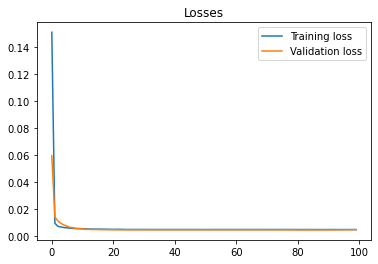

In [28]:
import torch.optim as optim

input_dim = len(X_train.columns)
output_dim = 5
hidden_dim = 64
layer_dim = 3
batch_size = 64
dropout = 0.2
n_epochs = 100
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('lstm', model_params)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()

lstm_predictions, values = opt.evaluate(test_loader_one, batch_size=1, n_features=input_dim)

## Gradient Boosting

In [17]:
import xgboost as xgb

reg = xgb.XGBRegressor(
    tree_method="hist", 
    n_estimators=64)
    
clf = reg.fit(X_train_arr, y_train_arr)

In [18]:
xg_predictions = reg.predict(X_test_arr)

In [19]:
xg_predictions

array([[0.5851296 , 0.41117203, 0.47383857, 0.51966786, 0.47221434],
       [0.60827315, 0.37263748, 0.4183382 , 0.59554946, 0.40028507],
       [0.5982437 , 0.3779243 , 0.43675932, 0.58577263, 0.42589524],
       ...,
       [0.6800196 , 0.5518358 , 0.48310953, 0.6349142 , 0.52033705],
       [0.6728498 , 0.5437957 , 0.48335737, 0.6618716 , 0.5423358 ],
       [0.6658538 , 0.5452222 , 0.4622061 , 0.6377128 , 0.5501155 ]],
      dtype=float32)

## Transformers

In [13]:
import torch.nn.functional as F
from torch import nn, Tensor

In [21]:
# #TESTING 
# transformer_model = nn.Transformer(nhead=16, num_encoder_layers=12)

# src = torch.rand((32, 512, ))
# tgt = torch.rand((32, 512))
# out = transformer_model(src, tgt)

In [22]:
X_train_arr.shape, y_test_arr.shape

((2409, 39), (803, 5))

In [15]:
from typing import Tuple


def get_src_trg(
        sequence: torch.Tensor, 
        enc_seq_len: int, 
        target_seq_len: int
        ) -> Tuple[torch.tensor, torch.tensor, torch.tensor]:

        """
        Generate the src (encoder input), trg (decoder input) and trg_y (the target)
        sequences from a sequence. 
        Args:
            sequence: tensor, a 1D tensor of length n where 
                    n = encoder input length + target sequence length  
            enc_seq_len: int, the desired length of the input to the transformer encoder
            target_seq_len: int, the desired length of the target sequence (the 
                            one against which the model output is compared)
        Return: 
            src: tensor, 1D, used as input to the transformer model
            trg: tensor, 1D, used as input to the transformer model
            trg_y: tensor, 1D, the target sequence against which the model output
                is compared when computing loss. 
        
        """

        assert len(sequence) == enc_seq_len + target_seq_len, "Sequence length does not equal (input length + target length)"
        
        #print("From data.TransformerDataset.get_src_trg: sequence shape: {}".format(sequence.shape))

        # encoder input
        src = sequence[:enc_seq_len] 
        
        # decoder input. As per the paper, it must have the same dimension as the 
        # target sequence, and it must contain the last value of src, and all
        # values of trg_y except the last (i.e. it must be shifted right by 1)
        trg = sequence[enc_seq_len-1:len(sequence)-1]

        # trg = trg[:, 0] 

        if len(trg.shape) == 1:
            trg = trg.unsqueeze(-1)
        
        assert len(trg) == target_seq_len, "Length of trg does not match target sequence length"

        # The target sequence against which the model output will be compared to compute loss
        trg_y = sequence[-target_seq_len:,-5:]

        #print("From data.TransformerDataset.get_src_trg: trg_y shape before slice: {}".format(trg_y.shape))

        # We only want trg_y to consist of the target variable not any potential exogenous variables
        # trg_y = trg_y[:, 0]

        assert len(trg_y) == target_seq_len, "Length of trg_y does not match target sequence length"

        return src, trg, trg_y # change size from [batch_size, target_seq_len, num_features] to [batch_size, target_seq_len] 

In [16]:
X_train_arr.shape, X_test_arr.shape

((2409, 39), (803, 39))

In [17]:
train_data = np.hstack((X_train_arr, y_train_arr))
test_data = np.hstack((X_test_arr, y_test_arr))

sequence = np.vstack((train_data, test_data))
sequence = torch.tensor(sequence, dtype=torch.float32)

enc_seq_len = len(y_train_arr)
target_seq_len = len(y_test_arr)

src, trg, trg_y = get_src_trg(sequence, enc_seq_len, target_seq_len)

In [18]:
src.shape, trg.shape, trg_y.shape

(torch.Size([2409, 44]), torch.Size([803, 44]), torch.Size([803, 5]))

In [27]:
src.size(-1), trg.size(-1)

(44, 44)

In [28]:
transformer_model = nn.Transformer(d_model = 44, nhead = 22, num_encoder_layers=12)

out = transformer_model(src, trg)
transformer_predictions = out.detach().numpy()[:, -5:] # we just need the final 5 cols for the returns 

In [29]:
# transformer_model = nn.Transformer(d_model = 44, nhead=11, num_encoder_layers=12)
# src = torch.rand((2409, 44))
# tgt = torch.rand((803, 44))
# out = transformer_model(src, tgt)

## Temporal Fusion Transformer

In [5]:
from pytorch_forecasting.data.encoders import NaNLabelEncoder
from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer, MultiNormalizer, TorchNormalizer
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger

In [4]:
tft_df = pd.read_csv('tft.csv')

In [6]:
tft_df.drop(columns='Unnamed: 0', inplace=True)
tft_df.sort_values(by=['Date'], inplace=True)

countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
all_countries = []
for _ in range(4015):
    all_countries.append(countries)

copied_countries = all_countries.copy()
all_countries = np.array(copied_countries)
countries = all_countries.reshape(20075)

tft_df['Country'] = countries

In [8]:
tft_df['Date']  = pd.to_datetime(tft_df['Date'])

In [9]:
tft_df['time_idx'] = tft_df.apply(lambda row: (row['Date'] - dt.datetime.strptime('2011-04-01', '%Y-%m-%d')).days, axis=1)

In [10]:
tft_df

,Open,High,Low,Close,Adj Close,Volume,Returns,Date,Country,time_idx
0,78.500000,79.370003,78.070000,79.220001,53.268791,16069100.0,0.022062,2011-04-01,Brazil,0
8030,10.477620,10.477620,10.477620,10.477620,10.477620,0.0,0.000995,2011-04-01,Russia,0
12045,52.580002,52.720001,52.529999,52.619999,42.883629,2900.0,0.013873,2011-04-01,India,0
4015,149.070007,150.550003,149.070007,150.550003,150.550003,1043.0,0.018675,2011-04-01,China,0
16060,3412.733400,3412.733400,3412.733400,3457.849800,3457.849800,1000.0,0.028368,2011-04-01,South Africa,0
...,...,...,...,...,...,...,...,...,...,...
12044,102.185997,102.185997,102.185997,102.185997,102.185997,0.0,0.000000,2022-03-28,Brazil,4014
4014,37.340000,37.509998,36.830002,37.400002,35.727489,23092400.0,-0.007694,2022-03-28,Russia,4014
16059,53.430000,53.889999,53.020000,53.709999,53.709999,7063400.0,0.011678,2022-03-28,India,4014
8029,22.025000,22.025000,22.025000,22.025000,22.025000,0.0,-0.025011,2022-03-28,China,4014


In [11]:
tft_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Date', 'Country', 'time_idx'],
      dtype='object')

In [12]:
tft_df[tft_df.isnull().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume,Returns,Date,Country,time_idx


In [235]:
training_cutoff = tft_df["time_idx"].max() - 365

In [15]:
from typing import List

max_prediction_length = 365
max_encoder_length = 730
training_cutoff = tft_df["time_idx"].max() - max_prediction_length

training = TimeSeriesDataSet(
    tft_df[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="Returns",
    group_ids=["Country"], 
    min_encoder_length=max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["Country"],
    # static_reals=["avg_population_2017", "avg_yearly_household_income_2017"],
    # time_varying_known_categoricals=["special_days", "month"],
    # variable_groups={"special_days": special_days},  # group of categorical variables can be treated as one variable
    time_varying_known_reals=['time_idx', 'Date'],

    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns'],
    target_normalizer=NaNLabelEncoder(
        add_nan=True, warn=False
    ),  # use softplus and normalize by group
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    # categorical_encoders=NaNLabelEncoder(add_nan=True)
)

# create validation set (predict=True) which means to predict the last max_prediction_length points in time
# for each series
validation = TimeSeriesDataSet.from_dataset(training, tft_df, predict=True, stop_randomization=True)

# create dataloaders for model
batch_size = 128  # set this between 32 to 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

In [19]:
# configure network and trainer
pl.seed_everything(42)
trainer = pl.Trainer(
    gpus=0,
    # clipping gradients is a hyperparameter and important to prevent divergance
    # of the gradient for recurrent neural networks
    gradient_clip_val=0.1,
)

tft = TemporalFusionTransformer.from_dataset(
    training,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.03,
    hidden_size=16,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    # reduce learning rate if no improvement in validation loss after x epochs
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

Global seed set to 42
c:\Users\Ntsika\Documents\School\Honours\Courses\Semester 2\Research\venv\lib\site-packages\pytorch_lightning\trainer\connectors\accelerator_connector.py:446: LightningDeprecationWarning: Setting `Trainer(gpus=0)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=0)` instead.
  rank_zero_deprecation(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\Ntsika\Documents\School\Honours\Courses\Semester 2\Research\venv\lib\site-packages\pytorch_lightning\utilities\parsing.py:262: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
c:\Users\Ntsika\Documents\School\Honours\Courses\Semester 2\Research\venv\lib\site-packages\pytorch_lightning\utilities\parsing.py:262: Use

Number of parameters in network: 23.2k


In [20]:
res = trainer.tuner.lr_find(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
    max_lr=10.0,
    min_lr=1e-6,
)

print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

c:\Users\Ntsika\Documents\School\Honours\Courses\Semester 2\Research\venv\lib\site-packages\pytorch_lightning\loops\utilities.py:94: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
c:\Users\Ntsika\Documents\School\Honours\Courses\Semester 2\Research\venv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\Ntsika\Documents\School\Honours\Courses\Semester 2\Research\venv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing

KeyError: 'radam_buffer'

In [21]:
# configure network and trainer
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning_logs")  # logging results to a tensorboard

trainer = pl.Trainer(
    max_epochs=30,
    gpus=0,
    enable_model_summary=True,
    gradient_clip_val=0.1,
    limit_train_batches=30,  # coment in for training, running valiation every 30 batches
    # fast_dev_run=True,  # comment in to check that networkor dataset has no serious bugs
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)


tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    log_interval=10,  # uncomment for learning rate finder and otherwise, e.g. to 10 for logging every 10 batches
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Number of parameters in network: 23.2k


In [22]:
PATH = "C:\\Users\\Ntsika\\Documents\\School\\Honours\\Courses\\Semester 2\\Research\\lightning_logs\\lightning_logs\\version_0\\checkpoints\\epoch=10-step=330.ckpt"

In [23]:
tft = tft.load_from_checkpoint(PATH)

c:\Users\Ntsika\Documents\School\Honours\Courses\Semester 2\Research\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [24]:
# fit network
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)


   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 20    
3  | prescalers                         | ModuleDict                      | 176   
4  | static_variable_selection          | VariableSelectionNetwork        | 630   
5  | encoder_variable_selection         | VariableSelectionNetwork        | 6.6 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 1.8 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K 
9  | static_context_initial_cell_lstm   | GatedResidualNetwork            | 1.1 

c:\Users\Ntsika\Documents\School\Honours\Courses\Semester 2\Research\venv\lib\site-packages\pytorch_lightning\trainer\trainer.py:1555: PossibleUserWarning: The number of training batches (30) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 0:  97%|█████████▋| 30/31 [12:21<00:24, 24.72s/it, loss=6.01e+03, v_num=1, train_loss_step=6.01e+3]
Validation: 0it [00:00, ?it/s]
Epoch 1:  97%|█████████▋| 30/31 [12:32<00:25, 25.08s/it, loss=6.01e+03, v_num=1, train_loss_step=6.02e+3, val_loss=2.48e+3, train_loss_epoch=6e+3]
Validation: 0it [00:00, ?it/s]
Epoch 2:  97%|█████████▋| 30/31 [12:25<00:24, 24.86s/it, loss=6e+03, v_num=1, train_loss_step=5.97e+3, val_loss=2.48e+3, train_loss_epoch=6.01e+3]
Validation: 0it [00:00, ?it/s]
Epoch 3:  97%|█████████▋| 30/31 [12:53<00:25, 25.80s/it, loss=5.98e+03, v_num=1, train_loss_step=5.95e+3, val_loss=2.48e+3, train_loss_epoch=6e+3]
Validation: 0it [00:00, ?it/s]
Epoch 4:  97%|█████████▋| 30/31 [14:38<00:29, 29.29s/it, loss=5.97e+03, v_num=1, train_loss_step=6e+3, val_loss=2.48e+3, train_loss_epoch=5.99e+3]   
Validation: 0it [00:00, ?it/s]
Epoch 5:  97%|█████████▋| 30/31 [13:06<00:26, 26.23s/it, loss=5.95e+03, v_num=1, train_loss_step=5.95e+3, val_loss=2.48e+3, train_loss_epoch=5.98e+3

In [27]:
import pickle

In [26]:


from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

# create study
study = optimize_hyperparameters(
    train_dataloader,
    val_dataloader,
    model_path="optuna_test",
    n_trials=200,
    max_epochs=50,
    gradient_clip_val_range=(0.01, 1.0),
    hidden_size_range=(8, 128),
    hidden_continuous_size_range=(8, 128),
    attention_head_size_range=(1, 4),
    learning_rate_range=(0.001, 0.1),
    dropout_range=(0.1, 0.3),
    trainer_kwargs=dict(limit_train_batches=30),
    reduce_on_plateau_patience=4,
    use_learning_rate_finder=False,  # use Optuna to find ideal learning rate or use in-built learning rate finder
)

# save study results - also we can resume tuning at a later point in time
with open("test_study.pkl", "wb") as fout:
    pickle.dump(study, fout)

# show best hyperparameters
print(study.best_trial.params)

[I 2022-11-02 14:41:04,574] A new study created in memory with name: no-name-e9b81042-b6aa-46b1-bc76-97297fc3353b
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\Ntsika\Documents\School\Honours\Courses\Semester 2\Research\venv\lib\site-packages\pytorch_lightning\utilities\parsing.py:262: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
c:\Users\Ntsika\Documents\School\Honours\Courses\Semester 2\Research\venv\lib\site-packages\pytorch_lightning\utilities\parsing.py:262: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(
c:\Users\Ntsika\Documents\School\

{'gradient_clip_val': 0.08398351388190495, 'hidden_size': 43, 'dropout': 0.1705101129713117, 'hidden_continuous_size': 42, 'attention_head_size': 2, 'learning_rate': 0.06942234886737075}


In [28]:
# load the best model according to the validation loss
# (given that we use early stopping, this is not necessarily the last epoch)
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

In [29]:
# calcualte mean absolute error on validation set
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
predictions = best_tft.predict(val_dataloader)
(actuals - predictions).abs().mean()

tensor(2497.3940)

In [30]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions, x = best_tft.predict(val_dataloader, mode="raw", return_x=True)

IndexError: index 5 is out of bounds for dimension 0 with size 5

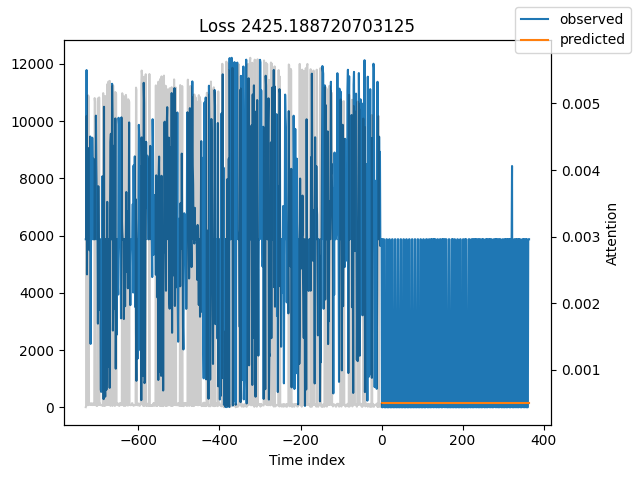

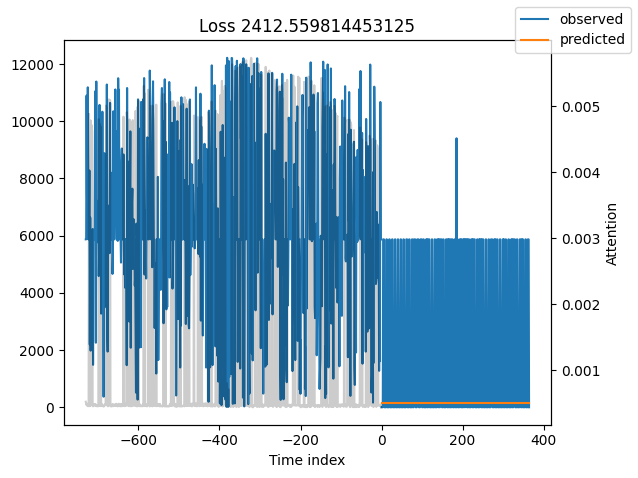

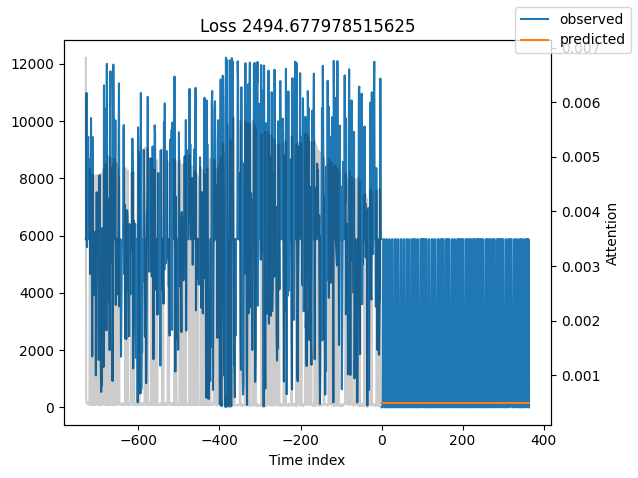

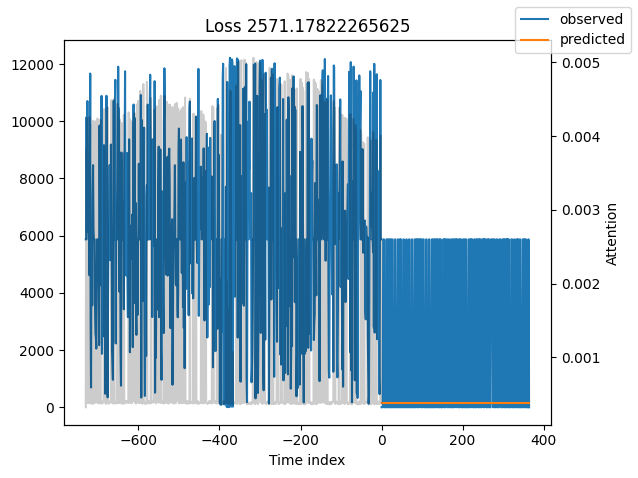

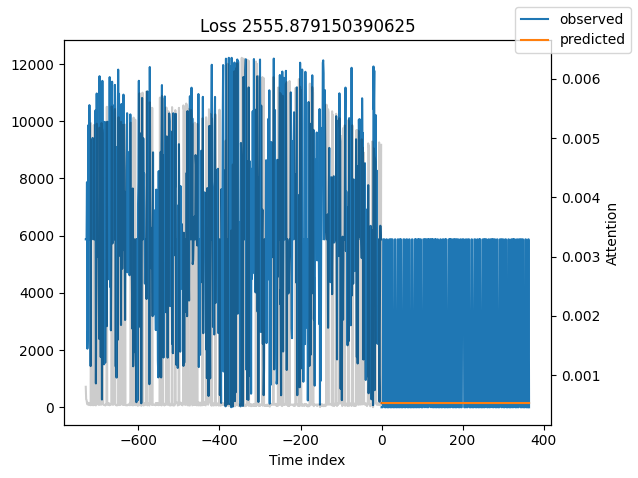

In [31]:
for idx in range(10):  # plot 10 examples
    best_tft.plot_prediction(x, raw_predictions, idx=idx, add_loss_to_title=True);

## Analysis of Results

In [30]:
def depict_results(predictions):
    
    arr = []
    for prediction in predictions:
        arr.append(prediction.flatten())

    predictions = np.array(arr)
    predicted = scaler.inverse_transform(predictions) 

    df_predicted = pd.DataFrame(predicted, 
                columns=['Brazil Returns',
                'Russia Returns',
                'India Returns', 
                'China Returns',
                'South Africa Returns'])

    return df_predicted

In [31]:
# predictions
lstm_df = depict_results(lstm_predictions)
xg_df = depict_results(xg_predictions)
transformer_df = depict_results(transformer_predictions)

In [2]:
lstm_df.to_csv('lstm_results.csv')
xg_df.to_csv('xg_results.csv')
transformer_df.to_csv('transformer_results.csv')

NameError: name 'lstm_df' is not defined

In [1]:
lstm_df

NameError: name 'lstm_df' is not defined

In [44]:
lstm_df.drop(columns='Unnamed: 0', inplace=True)
xg_df.drop(columns='Unnamed: 0', inplace=True)
transformer_df.drop(columns='Unnamed: 0', inplace=True)

In [45]:
lstm_mae = mean_absolute_error(lstm_df, y_test)
xg_mae = mean_absolute_error(xg_df, y_test)
transformer_mae = mean_absolute_error(transformer_df, y_test)

In [46]:
lstm_mae, xg_mae, transformer_mae

(0.012295575133412848, 0.01926163054190369, 0.08135306997088222)

In [47]:
lstm_mse = mean_squared_error(lstm_df, y_test)
xg_mse = mean_squared_error(xg_df, y_test)
transformer_mse = mean_squared_error(transformer_df, y_test)

In [48]:
lstm_mse, xg_mse, transformer_mse

(0.0005884616188611248, 0.000937936838406417, 0.011095821232349866)

In [56]:
lstm_results_arr = lstm_df.to_numpy().flatten()
y_test_arr = y_test_arr.flatten()

In [57]:
y_test_arr.shape, lstm_results_arr.shape

((4015,), (4015,))

In [59]:
def max_drawdown(df, window=252):
    
    roll_max = df['Close'].rolling(window, min_periods=1).max()
    daily_drawdown = df['Close']/roll_max - 1.0

    max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

    return max_daily_drawdown